In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META'] # Valitud aktsiate sümbolid
start_date = '2019-01-01' # Andmete laadimise alguskuupäev
end_date = '2024-01-23' # Andmete laadimise lõppkuupäev

In [ ]:
df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start_date, end_date)
    df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [ ]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [ ]:
returns = np.log(df / df.shift(1))
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(tickers)
risk_free_rate = 0.01

In [ ]:
num_portfolios = 5000
results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

In [ ]:
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T

In [ ]:
min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T

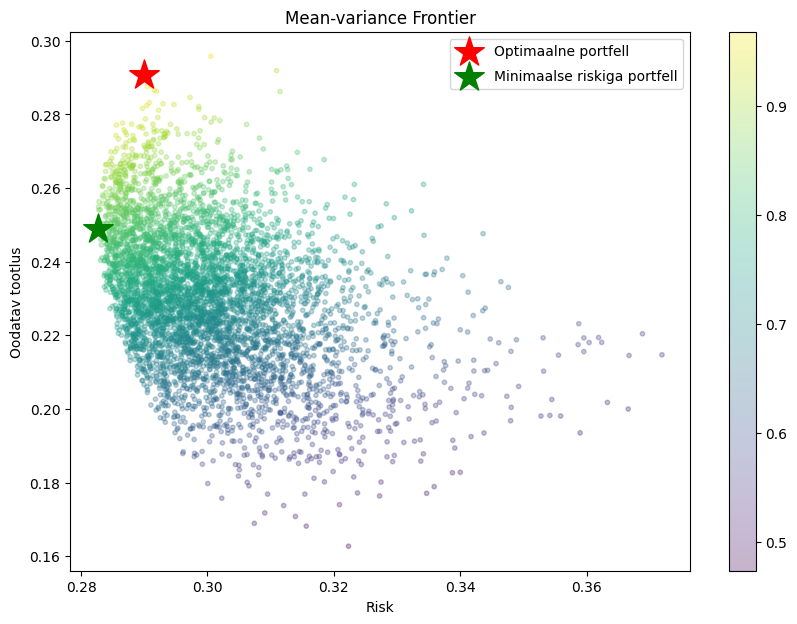

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar()
plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Optimaalne portfell')
plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimaalse riskiga portfell')
plt.title('Mean-variance Frontier')
plt.xlabel('Risk')
plt.ylabel('Oodatav tootlus')
plt.legend(labelspacing=0.8)
plt.show()

In [ ]:
print("-"*80)
print("Optimaalse portfelli aktsiate osakaalud:\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimaalse riskiga portfelli aktsiate osakaalud:\n")
print(min_vol_allocation)

--------------------------------------------------------------------------------
Optimaalse portfelli aktsiate osakaalud:

            AAPL  MSFT  AMZN  GOOGL  META
allocation  50.6  37.8  4.47   6.69  0.45
--------------------------------------------------------------------------------
Minimaalse riskiga portfelli aktsiate osakaalud:

            AAPL   MSFT   AMZN  GOOGL  META
allocation  28.1  28.97  16.04  26.22  0.66
